In [1]:
%pylab inline
from pygadgetreader import readsnap
from biff import *



Populating the interactive namespace from numpy and matplotlib


In [53]:
haloLR = readsnap('../../data/MW_models/triaxial/spherical_002.hdf5', 'pos', 'dm')
haloHR = readsnap('../../data/MW_models/triaxial/spherical_HR_000.hdf5', 'pos', 'dm')

In [3]:
print(len(haloLR))
print(len(haloHR))

500000
40000000


In [5]:
SLR, TLR = compute_coeffs_discrete(np.ascontiguousarray(haloLR.astype(np.float64)), 1/np.ones(len(haloLR)).astype(np.float64), 0, 20, 40.85, skip_m=True)

In [6]:
SHR, THR = compute_coeffs_discrete(np.ascontiguousarray(haloHR.astype(np.float64)), 1/np.ones(len(haloHR)).astype(np.float64), 0, 20, 40.85, skip_m=True)

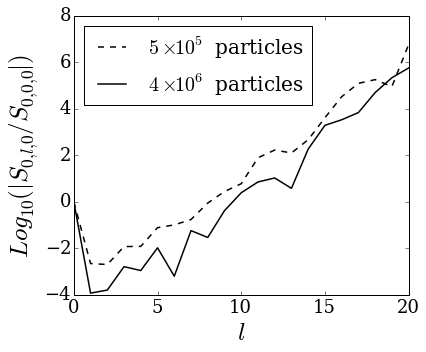

In [20]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)
figure(figsize=(6,5))
plot(np.log10(np.abs(SLR[0,:,0])/np.abs(SLR[0,0,0])), c='k', lw=1.5, ls='--', label=r'$5 \times 10^5$ particles')
plot(np.log10(np.abs(SHR[0,:,0])/np.abs(SHR[0,0,0])), c='k', lw=1.5, label=r'$4 \times 10^6$ particles')
xlabel('$l$', fontsize=25)
ylabel('$Log_{10}(|S_{0,l,0}/S_{0,0,0}|)$', fontsize=25)
legend(loc='best', fontsize=20)
savefig('Hernquist_coeff.png', bbox_inches='tight')

In [7]:
r_log = np.logspace(0, 3, 1000)
r = np.zeros((3, 1000))
r[0] = r_log


In [8]:
rhoLR = potential(np.ascontiguousarray(r.T.astype(np.float64)), SLR, TLR, G=1, M=1, r_s=40.85)


In [34]:
np.shape(SLR)

(1, 21, 21)

In [43]:
SLR00 = np.zeros((1,1,1))
SLR00[0,0,0] = SLR[0,0,0]

TLR00 = np.zeros((1,1,1))
TLR00[0,0,0] = TLR[0,0,0]


SLR8 = np.zeros((1,21,21))
SLR8[0,8,0] = SLR[0,8,0]

TLR8 = np.zeros((1,21,21))
TLR8[0,8,0] = TLR[0,8,0]



SLR16 = np.zeros((1,21,21))
SLR16[0,16,0] = SLR[0,16,0]

TLR16 = np.zeros((1,21,21))
TLR16[0,16,0] = TLR[0,16,0]



SLR21 = np.zeros((1,21,21))
SLR21[0,20,0] = SLR[0,20,0]

TLR21 = np.zeros((1,21,21))
TLR21[0,20,0] = TLR[0,20,0]

In [45]:
rhoLR_00 = potential(np.ascontiguousarray(r.T.astype(np.float64)), SLR00, TLR00, G=1, M=1, r_s=40.85)
rhoLR_8 = potential(np.ascontiguousarray(r.T.astype(np.float64)), SLR8, TLR8, G=1, M=1, r_s=40.85)
rhoLR_16 = potential(np.ascontiguousarray(r.T.astype(np.float64)), SLR16, TLR16, G=1, M=1, r_s=40.85)
rhoLR_21 = potential(np.ascontiguousarray(r.T.astype(np.float64)), SLR21, TLR21, G=1, M=1, r_s=40.85)



In [11]:
rhoHR = potential(np.ascontiguousarray(r.T.astype(np.float64)), SHR, THR, G=1, M=1, r_s=40.85)

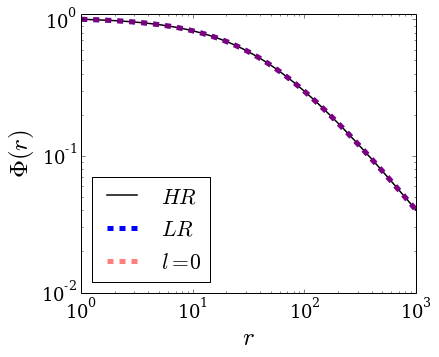

In [78]:
figure(figsize=(6,5))


loglog(r_log, np.abs(rhoHR)/np.max(np.abs(rhoHR)), c='k', lw=1.5, label='$HR$')
loglog(r_log, np.abs(rhoLR)/np.max(np.abs(rhoLR)), c='b', lw=5, ls='--', label='$LR$')
loglog(r_log, np.abs(rhoLR_00)/np.max(np.abs(rhoLR)), c='r', lw=5, ls='--', alpha=0.5, label='$l=0$')
legend(loc='best')
xlabel('$r$', fontsize=25)
ylabel('$\Phi(r)$', fontsize=25)
ylim(0.01, 1.1)

savefig('Henrquist_pot.png', bbox_inches='tight')

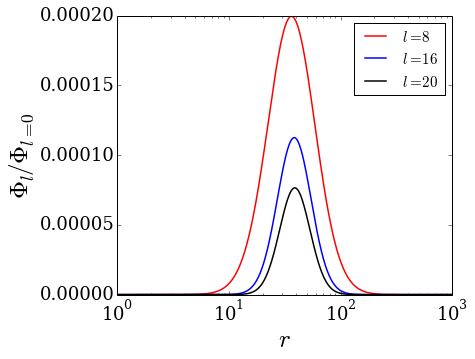

In [79]:
figure(figsize=(6,5))


semilogx(r_log, np.abs(rhoLR_8)/(np.abs(np.max(rhoLR_00))), c='r', lw=1.5, ls='-', label='$l=8$')
semilogx(r_log, np.abs(rhoLR_16)/(np.abs(np.max(rhoLR_00))), c='b', lw=1.5, ls='-', label='$l=16$')
semilogx(r_log, np.abs(rhoLR_21)/(np.abs(np.max(rhoLR_00))), c='k', lw=1.5, ls='-', label='$l=20$')
xlabel('$r$', fontsize=25)
ylabel('$\Phi_{l}/\Phi_{l=0}$', fontsize=25)
#ylim(-0.5, 1.5)
legend(loc='best', fontsize=15)
savefig('Henrquist_pot_ratios.png', bbox_inches='tight')